In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
from rdkit import Chem
%matplotlib inline

In [39]:
import rdkit
from rdkit import Chem
smi = "O=C(O)c1ccc(N2CCC(Oc3ccccc3C(F)(F)F)CC2)nn1"

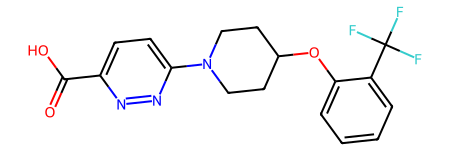

In [40]:
mol_from_smi = Chem.MolFromSmiles(smi)
mol_from_smi

In [41]:
smi_from_mol = Chem.MolToSmiles(mol_from_smi)
smi_from_mol

'O=C(O)c1ccc(N2CCC(Oc3ccccc3C(F)(F)F)CC2)nn1'

### Load Labeled Data

In [42]:
D_s = pd.read_csv('SCD1_clean_pIC50.csv')
D_s.head()

,SMILES,pIC50
0,O=C(O)c1ccc(N2CCC(Oc3ccccc3C(F)(F)F)CC2)nn1,5.00
1,O=C(NCC1CC1)c1ccc(N2CCN(C(=O)c3ccccc3C(F)(F)F)...,5.06
2,O=C(O)c1cncc(-c2ccc(N3CCC(Oc4ccccc4C(F)(F)F)CC...,5.07
3,O=C(O)CCCCCc1nc(-c2cn(Cc3cc(Br)c(Br)c(Br)c3)nn...,5.08
4,Cc1ccc(C(=O)Nc2ncc(Cc3cccc(C(F)(F)F)c3)s2)cc1C,5.09


In [43]:
D_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SMILES  642 non-null    object 
 1   pIC50   642 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


### Functions to create additional labels

In [44]:
# to calculate molecular weight
from rdkit.Chem import Descriptors

def get_label(pic50):
    if pic50 >= 7.0:
        return int(1)
    else:
        return int(0)
    
def get_molecular_weight(smi):
    mol = Chem.MolFromSmiles(smi)
    return float(Descriptors.MolWt(mol))

In [45]:
D_s['smile_length'] = D_s['SMILES'].apply(lambda x: len(x))

In [46]:
D_s.head()

,SMILES,pIC50,smile_length
0,O=C(O)c1ccc(N2CCC(Oc3ccccc3C(F)(F)F)CC2)nn1,5.00,43
1,O=C(NCC1CC1)c1ccc(N2CCN(C(=O)c3ccccc3C(F)(F)F)...,5.06,53
2,O=C(O)c1cncc(-c2ccc(N3CCC(Oc4ccccc4C(F)(F)F)CC...,5.07,54
3,O=C(O)CCCCCc1nc(-c2cn(Cc3cc(Br)c(Br)c(Br)c3)nn...,5.08,51
4,Cc1ccc(C(=O)Nc2ncc(Cc3cccc(C(F)(F)F)c3)s2)cc1C,5.09,46


In [47]:
D_s['activity'] = D_s['pIC50'].apply(get_label)
D_s.head()

,SMILES,pIC50,smile_length,activity
0,O=C(O)c1ccc(N2CCC(Oc3ccccc3C(F)(F)F)CC2)nn1,5.00,43,0
1,O=C(NCC1CC1)c1ccc(N2CCN(C(=O)c3ccccc3C(F)(F)F)...,5.06,53,0
2,O=C(O)c1cncc(-c2ccc(N3CCC(Oc4ccccc4C(F)(F)F)CC...,5.07,54,0
3,O=C(O)CCCCCc1nc(-c2cn(Cc3cc(Br)c(Br)c(Br)c3)nn...,5.08,51,0
4,Cc1ccc(C(=O)Nc2ncc(Cc3cccc(C(F)(F)F)c3)s2)cc1C,5.09,46,0


In [48]:
D_s.groupby('activity').count()

,SMILES,pIC50,smile_length
activity,,,
0,275,275,275
1,367,367,367


In [49]:
D_s['molecular_weight'] = D_s['SMILES'].apply(get_molecular_weight)
D_s.head()

,SMILES,pIC50,smile_length,activity,molecular_weight
0,O=C(O)c1ccc(N2CCC(Oc3ccccc3C(F)(F)F)CC2)nn1,5.00,43,0,367.327
1,O=C(NCC1CC1)c1ccc(N2CCN(C(=O)c3ccccc3C(F)(F)F)...,5.06,53,0,433.434
2,O=C(O)c1cncc(-c2ccc(N3CCC(Oc4ccccc4C(F)(F)F)CC...,5.07,54,0,442.437
3,O=C(O)CCCCCc1nc(-c2cn(Cc3cc(Br)c(Br)c(Br)c3)nn...,5.08,51,0,578.059
4,Cc1ccc(C(=O)Nc2ncc(Cc3cccc(C(F)(F)F)c3)s2)cc1C,5.09,46,0,390.430


In [50]:
# get info on attributes
D_s.describe()

,pIC50,smile_length,activity,molecular_weight
count,642.000000,642.000000,642.000000,642.000000
mean,7.074735,49.609034,0.571651,420.799484
std,1.092826,7.018681,0.495225,55.435794
min,4.170000,21.000000,0.000000,277.061000
25%,6.345000,45.000000,0.000000,379.342000
50%,7.210000,49.000000,1.000000,421.494500
75%,7.820000,54.000000,1.000000,460.843000
max,10.520000,65.000000,1.000000,600.029000


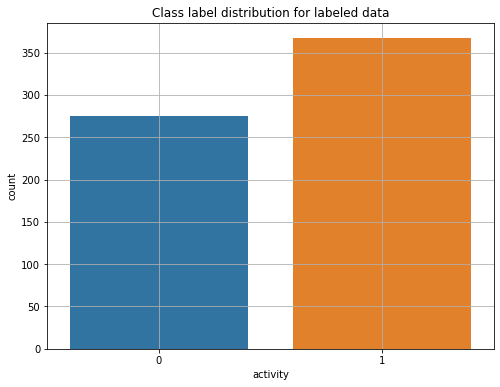

In [51]:
plt.figure(figsize = (8, 6))
plt.title(f'Class label distribution for labeled data')
plt.ylabel('No. of datapoints')
plt.xlabel('activity')
sns.countplot(x = D_s['activity'])
plt.grid()

In [52]:
# get min and max molecular weight for filtering values
print(D_s.describe()['molecular_weight']['max'])
print(D_s.describe()['molecular_weight']['min'])
print(D_s.describe()['smile_length']['max'])
print(D_s.describe()['smile_length']['min'])

600.0289999999999
277.06100000000004
65.0
21.0


In [53]:
# drop all columns except 'activity' and 'SMILES'
D_s.drop(['pIC50', 'smile_length', 'molecular_weight'], inplace = True, axis = 1)

# save file
D_s.to_csv('D_s_SCD1.csv', index = False)

### Load Unlabeled Data
The data below was filtered based on minimum and maximum molecular weight of the labeled data as well as minimum and maximum length of the SMILES string. 

In [30]:
D_u = pd.read_csv('chembl_uniq_final.txt')
D_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851866 entries, 0 to 851865
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   SMILES  851866 non-null  object
dtypes: object(1)
memory usage: 6.5+ MB


Ever after filtering the dataset still has about ~ 1000000 molecules. To select the number of unlabeled data, any molecule containing a unique token not in the original labeled dataset will be removd

In [26]:
smiles_list = D_s['SMILES'].tolist()

# concatenate all items to get a single string
single_str = ''.join(smiles_list)

In [27]:
# create a list of char
char_list = [c for c in single_str]
len(char_list)

31849

In [28]:
# get unique chars
tokens = list(set(char_list))
len(tokens)

29

In [23]:
# returns 0 if smile satisfies all token conditions
# returns 1 if smile has a token not contained in the token list
def get_drop_label(smi):
    
    for c in smi:
        if c not in tokens:
            return int(1)
        
    # return 0 if all characters in the smile are present in tokens
    return int(0)

In [32]:
D_u['drop_label'] = D_u['SMILES'].apply(get_drop_label)

In [34]:
D_u.groupby('drop_label').count()

,SMILES
drop_label,
0,851726
1,140


In [35]:
D_u.drop((D_u[D_u['drop_label'] == 1]).index, inplace = True)

In [36]:
D_u.groupby('drop_label').count()

,SMILES
drop_label,
0,851726


In [55]:
D_u.drop(['drop_label'], axis = 1, inplace = True)

# save file
D_u.to_csv('D_u_SCD1.csv', index = False)